In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def show_img(img):
    fig = plt.figure(figsize=(11, 11), dpi= 80, facecolor='w', edgecolor='k')
    plt.imshow(img)

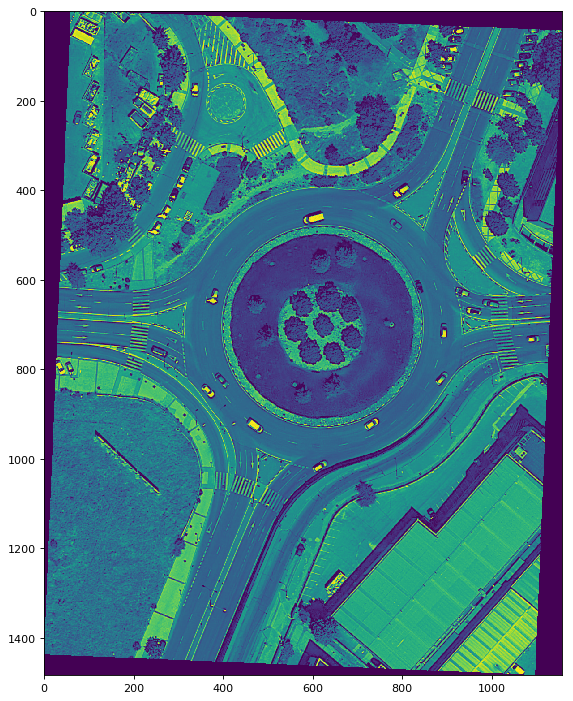

In [27]:
img = cv2.imread('../data_t/p0099.png')#parameters was tuned by hand on p0070
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_img(gray)

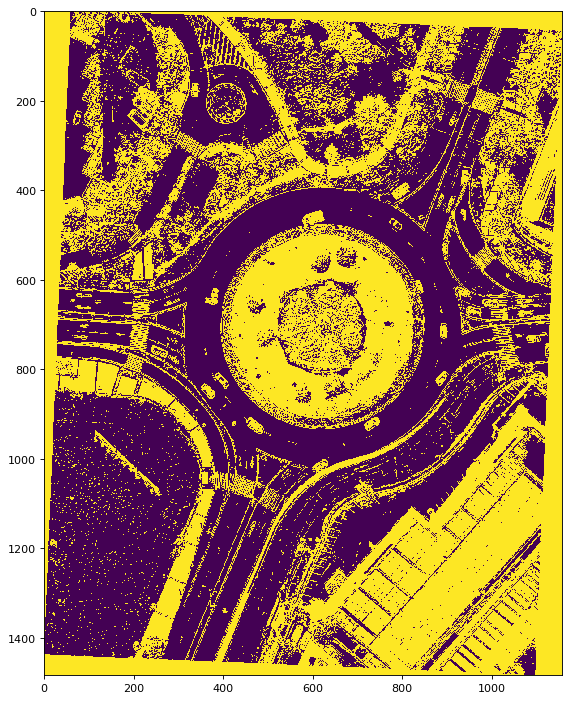

In [4]:
bgc = np.median(gray)
low, high = 0.7*bgc, 1.6*bgc

def trinary(gray, low, high):
    _, one = cv2.threshold(gray, low, 100, cv2.THRESH_BINARY)
    _, two = cv2.threshold(gray, high, 255, cv2.THRESH_BINARY)
    return one

_, one = cv2.threshold(gray, low, 100, cv2.THRESH_BINARY)
_, two = cv2.threshold(gray, high, 100, cv2.THRESH_BINARY)
t = np.add(one , two)
res = np.zeros(t.shape)
res[t==0]= 1
res[t==200]= 1
show_img(res)



In [5]:
#res
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(res.astype(np.uint8), 4,cv2.CV_32S)
# label_info = {}
# for i in range(0, len(stats)):
#     label_info[i]= stats[i,:]

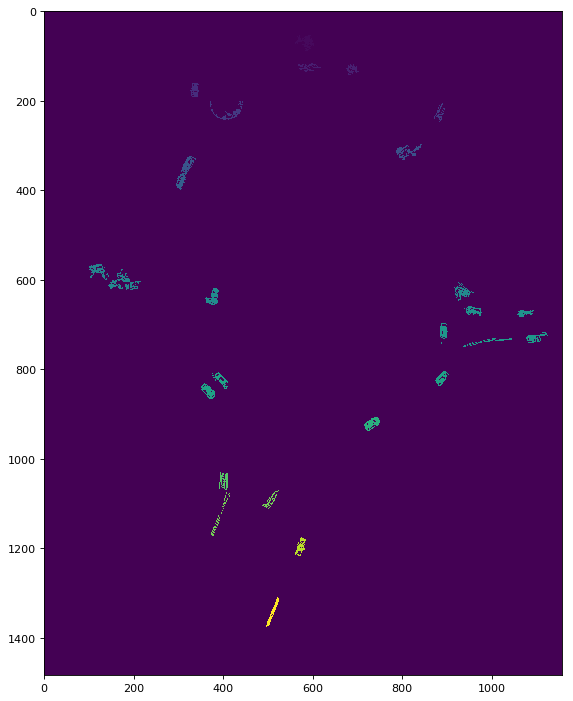

In [43]:
l, r = 300, 700
selected_labels = []
for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
        lab = labels[i][j]
        if lab > 0:
            if l > stats[lab,4] or stats[lab,4] > r:
                labels[i][j]= 0
            else:
                selected_labels.append(lab)

            
show_img(labels)

In [44]:
not_car = []
selected_labels= set(selected_labels)

for lab in selected_labels:
    max_side_size = np.sqrt(stats[lab,4])* 2.2
    if  max(stats[lab,2:4]) > max_side_size:
        not_car.append(lab)

for nc in not_car:
    selected_labels.remove(nc)
    

cars = np.zeros(labels.shape, dtype = 'uint8')
for carl in selected_labels:
    cars[labels == carl]= 1



In [45]:
img[100,100]

array([124, 138, 147], dtype=uint8)

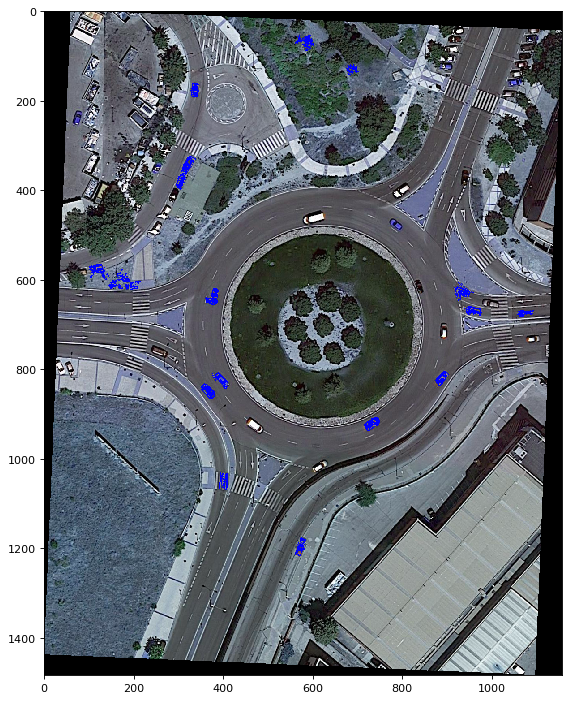

In [46]:
simg = img

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        lab = cars[i][j]
        if lab > 0:
            simg[i,j] = np.array([0,0,255])
show_img(simg )

In [10]:
selected_labels

[stats[x,:] for x in selected_labels]

[array([ 561, 1177,   25,   42,  444], dtype=int32),
 array([873, 806,  31,  33, 442], dtype=int32),
 array([675, 120,  28,  26, 330], dtype=int32),
 array([916, 606,  45,  45, 620], dtype=int32),
 array([376, 808,  37,  38, 425], dtype=int32),
 array([351, 833,  32,  35, 548], dtype=int32),
 array([360, 621,  30,  38, 598], dtype=int32),
 array([100, 566,  46,  37, 608], dtype=int32),
 array([295, 363,  24,  38, 461], dtype=int32),
 array([326, 162,  20,  33, 428], dtype=int32),
 array([938, 661,  40,  21, 492], dtype=int32),
 array([ 391, 1032,   21,   40,  502], dtype=int32),
 array([306, 324,  33,  39, 534], dtype=int32),
 array([144, 599,  33,  23, 303], dtype=int32),
 array([561,  55,  43,  36, 645], dtype=int32),
 array([715, 908,  36,  32, 587], dtype=int32)]